In [24]:
## import delle Librerie
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
from scipy.integrate import solve_ivp

# ESERCIZIO 1
La funzione evento che si fornisce come input al metodo "solve_ivp" deve cambiare segno.
Provare a risolvere lo stesso esercizio precedente della palla di cannone usando come hit_ground il valore assoluto di y[0] e mostrare che in tal caso, nonostante la funzione si annulli, l'evento non viene individuato.

In [25]:
g=9.81;
def upward_cannon(t, y): return [y[1], -g]
tf=4.;
tempi=[0.0,tf];
y0 = [0.0,10.0];

# EVENTO:
def hit_ground(t, y):     return abs(y[0])
hit_ground.terminal = True
hit_ground.direction = -1   # direzione -1 significa che l'evento è dato dal passaggio della 
                            # "funzione evento" da positiva a negativa

sol = solve_ivp(upward_cannon,tempi, y0, events=hit_ground, max_step=0.01)

try:
    print("L'istante di contatto col terreno avviene al tempo",sol.t_events[0][0])
except:
    print("IndexError: index 0 is out of bounds for axis 0 with size 0")
    print("\n-> Questo perchè non è stato rilevato l'evento di contatto")

IndexError: index 0 is out of bounds for axis 0 with size 0

-> Questo perchè non è stato rilevato l'evento di contatto


# ESERCIZIO 2
Modificare uno dei metodi base visti, aggiungendo l'Event Detection e applicarlo ai problemi visti.

Ad esempio mostriamo qui il caso di Eulero Esplicito con passo variabile visto nella scorsa esercitazione in cui abbiamo aggiunto il rilevamento di un evento.

Come equazione differenziale da risolvere abbiamo considerato il problema test con $k= 50$ e come funzione evento: $$event(t,y) = y -0.2$$


In [26]:
# Problema TEST e Soluzione analitica:
k = 50.0;
func_test = lambda y: -k *y;

def event(t,y): return y-0.2
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

Text(0.5, 1.0, 'Passo ad ogni iterazione')

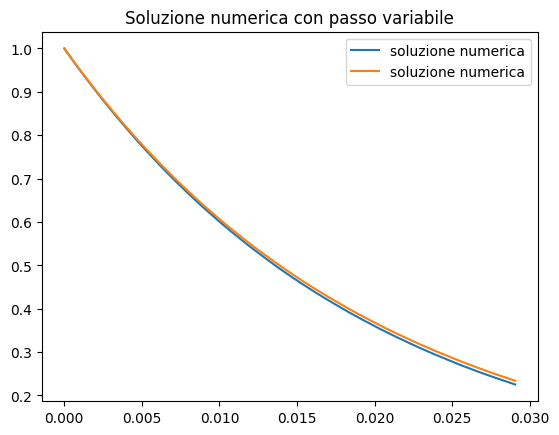

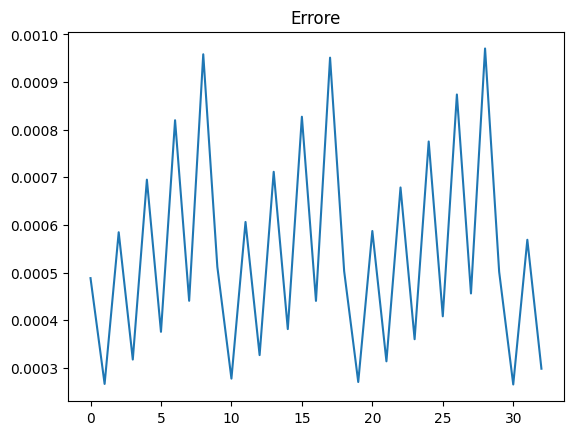

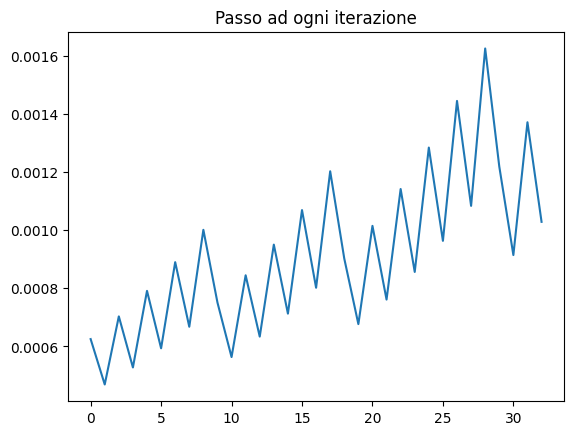

In [27]:
# Metodo di Eulero Esplicito o "in avanti" (EE) con passo variabile

tf = 0.1;
N = 200;                          # numero passi(che avranno lunghezze variabili) che si vogliono simulare
u_EE  = np.zeros(N);              # array che conterra' la soluzione
err  = np.zeros(N-1);             # array che conterra' l'errore stimato ad ogni passo
h  = np.zeros(N);                 # array che conterra' la lunghezza dei passi
times = np.zeros(N);              # array che conterra' i tempi a cui viene calcolata la soluzione
u_n   = 1.0;                      # punto iniziale
u_EE[0] = u_n;
h0 = 0.01;                        # passo iniziale
h[0] = h0 ;
tol  = 0.001;                      # tolleranza

i = 0;                            # iterazione
f_un = func_test(u_n);            # funzione nel punto iniziale
while i < N-1:
    u_n1      = u_n + h[i]* f_un;
    f_un1 = func_test(u_n1);
    # stima del punto 
    u_n1_TR = u_n + 0.5* h[i]*( f_un + f_un1) ;
    
    # stima dell'errore del passo "errore locale di troncamento"
    err[i] = np.linalg.norm(u_n1_TR - u_n1);
    
    if err[i] < tol:
        
        u_EE[i+1] = u_n1;
        times[i+1] = times[i] + h[i];
        
        '''
        Se la funzione "event" cambia segno da (t_n,u_n)  a (t_n+1, u_n+1) 
        - interrompere il ciclo "while" (col comando "break")
        - per una migliore visualizzazione del risultato finale, eliminare le rimanenti componenti degli array times, u_EE, err, h.
        - se si vuole, provare a localizzare nel tempo l'evento
        '''
        if event(times[i],u_n)*event(times[i+1],u_n1) <= 0:
            u_EE = u_EE[0:i]
            times = times[0:i]
            h = h[0:i]
            err = err[0:i]
            break

        
        u_n       = u_n1;
        f_un = f_un1;        
        h[i+1]= 1.5*h[i];
        
        i =i+1;    # passiamo al passo successivo
    else:
        # STEP DA RIFARE perche' l'errore stimato e' troppo grande, bizogna abbassare il passo
        h[i]= 0.5*h[i]
#end


''' GRAFICO
 - confronto tra la soluzione numerica e quella reale
 - grafico dell'errore
 - grafico del passo scelto
''' 
y_real = sol_real(u_EE[0],times[0],times);
plt.figure(1)
plt.plot(times,u_EE,label='soluzione numerica')
plt.plot(times,y_real,label='soluzione numerica')
plt.legend()
plt.title('Soluzione numerica con passo variabile')
plt.figure(2)
plt.plot(err)
plt.title('Errore')
plt.figure(3)
plt.plot(h)
plt.title('Passo ad ogni iterazione')